# DATA EXPLORATION AND VISUALIZATION

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

We will explore the data and try to answer the following questions: 

What were the most common first 8 moves for white and black each year? How have these opening moves changed over time?

For each year in the data set, how many unique moves were made at each part of the game (opening, early, midgame and endgame)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true

If PKL will not load or some other issues, try this link and use the read_csv method.
https://archive.org/download/chess_data_202206/chess_data.csv

In [2]:
# conda install pandas = 1.4.2
print(pd.__version__)

1.4.2


In [3]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true', compression = 'zip')

In [4]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
Game1,2000,1-0,2851,2555,147,d4,d5,c4,e6,Nc3,Nf6,cxd5,exd5,Bg5,c6,Qc2,Be7,e3,Nbd7,Bd3,O-O,Nge2,Re8,O-O,Nf8,f3,Ng6,Rad1,h6,Bxf6,Bxf6,Bxg6,fxg6,e4,g5,e5,Be7,f4,gxf4,Nxf4,Rf8,Ng6,Rxf1+,Rxf1,Be6,Ne2,Qd7,h4,Re8,Ng3,Bf7,Nxe7+,Rxe7,Nf5,Re6,Nd6,Bg6,Qc3,Rxd6,exd6,Qxd6,Qa3,Qb8,Qe7,Qg3,Rf3,Qg4,Qf8+,Kh7,Qf4,Qd7,Rg3,Be4,Qe5,Qf7,h5,Qd7,b4,a6,a4,Kg8,a5,Kh7,Kf2,Kg8,Qb8+,Kh7,Qf8,Bc2,Qf4,Be4,Qe5,Kg8,Ke3,Kh7,Ke2,Kg8,Qb8+,Kh7,Qf8,Bc2,Kd2,Be4,Kc1,Qc7,Rg4,Qd7,Rf4,Bxg2,Qf5+,Qxf5,Rxf5,Kg8,d2,h3,f4,e6,e3,f7,f5,f8,e5,e8,f4,f7,g4,e8,g3,f7,f4,e8,f5,xh5,e6,g6,e3,c2,f3+,g8,5,xb5,xd5,4,c4,3,c3,5,5,4,f4,5,6,<NA>,<NA>,<NA>
Game2,2000,1-0,2851,2544,45,e4,c5,Nf3,Nc6,Bb5,d6,c3,Nf6,Qe2,e5,d4,exd4,cxd4,a6,e5,Nd5,exd6+,Be6,Bxc6+,bxc6,dxc5,Qa5+,Bd2,Qxc5,O-O,Kd7,Na3,Bxd6,Rab1,Bf5,Rbc1,Rhe8,Qd1,Qa7,Nc4,Bc7,Bc3,f6,Nd4,Be6,Nxc6,Kxc6,Bd4,Qb8,Qa4+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game3,2000,1-0,2851,2748,90,d4,d5,c4,c6,Nc3,Nf6,Nf3,dxc4,a4,Bf5,Ne5,Nbd7,Nxc4,Qc7,g3,e5,dxe5,Nxe5,Bf4,Nfd7,Bg2,g5,Ne3,gxf4,Nxf5,O-O-O,Qc2,Ng4,a5,fxg3,hxg3,a6,Ra4,Ndf6,Ne4,Nxe4,Bxe4,h5,Kf1,Kb8,Kg2,Be7,Nxe7,Qxe7,Bf3,Ne5,Bxh5,Qe6,Qc3,f6,Rah4,Qf5,Bf3,Rxh4,Rxh4,Qb1,Rh1,Rd1,Rxd1,Qxd1,b4,Kc7,Qc5,Qd6,Qxd6+,Kxd6,Be4,Nc4,Bd3,Nb2,f4,Nd1,g4,Ne3+,Kf3,Nd5,Ke4,Nxb4,Bc4,c5,g5,fxg5,fxg5,Ke7,Kf5,Nc2,Ke5,Ne3,Be6,c4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game4,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game5,2000,1-0,2851,2751,69,e4,e6,d4,d5,Nc3,Nf6,Bg5,dxe4,Nxe4,Nbd7,Nf3,Be7,Nxf6+,Bxf6,h4,O-O,Bd3,c5,Qe2,cxd4,Qe4,g6,O-O-O,Qa5,Bxf6,Nxf6,Qxd4,Nh5,a3,Rd8,Qe3,Bd7,g4,Nf6,Qf4,Nd5,Qh6,Nf6,Ng5,Bc6,Bxg6,hxg6,Nxe6,fxe6,Qxg6+,Kh8,Qxf6+,Kh7,Rhe1,Rxd1+,Rxd1,Qc5,g5,Rf8,Qh6+,Kg8,Qxe6+,Kg7,Qh6+,Kg8,Qg6+,Kh8,Qh6+,Kg8,Qe6+,Kg7,Rd6,Be8,Qe7+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

Let's explore how many games were played in each year. We see that we can probably remove games that were played 1970 and earlier since there are so few of them. 

In [5]:
chess_data[['Date']].value_counts()

Date
2004    14738
2005    13852
2003    13185
2002    12167
2006    11229
2001    10411
2000     9783
1999     8473
1998     7820
1997     6876
1996     6647
1995     5598
1994     4816
1993     4046
2007     3365
1992     3350
1991     2857
1990     2391
1989     2076
1988     1865
1987     1195
1986      994
1984      900
1985      892
1981      855
1982      831
1983      722
1980      717
1978      693
1979      597
1977      453
1976      439
1972      404
1975      375
1974      287
1973      269
1971      168
1970       26
1968       18
1966       11
1906        8
1964        7
1905        5
1958        3
1956        2
1952        1
dtype: int64

In [6]:
# Let's take out any games on or before 1970 since there are so few of them
chess_data = chess_data[chess_data['Date'] > 1970]

In [7]:
chess_data[['Date']].value_counts()

Date
2004    14738
2005    13852
2003    13185
2002    12167
2006    11229
2001    10411
2000     9783
1999     8473
1998     7820
1997     6876
1996     6647
1995     5598
1994     4816
1993     4046
2007     3365
1992     3350
1991     2857
1990     2391
1989     2076
1988     1865
1987     1195
1986      994
1984      900
1985      892
1981      855
1982      831
1983      722
1980      717
1978      693
1979      597
1977      453
1976      439
1972      404
1975      375
1974      287
1973      269
1971      168
dtype: int64

In our current data set we observe that White has slightly more wins than Black. White is expected to win more than Black on average because it is generally accepted that White has an advantage. Chess.com compiles and analyzes their own database of chess games. White consistently wins more often than Black in their data set.

In [8]:
chess_data[['Game Result']].value_counts()

Game Result
1-0            88204
0-1            68132
dtype: int64

Knowing the typical percentage win for white will become useful later when we compare it to the predicted wins using our model.

In [9]:
# find percentage wins for white
(chess_data[['Game Result']].value_counts()[0]) / chess_data.shape[0]

0.5641950670351039

Digging deeper we observe that there are mostly games in which White had a higher ELO rating than Black. This fact indicates that there could be a strong correlation between the ELO rating of a player and how often they beat the player with a weaker ELO rating. 

In [10]:
# number of games where white had higher ELO rating
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']].shape[0]

81061

In [11]:
# number of games where black had higher elo rating.
chess_data[chess_data['B-ELO'] > chess_data['W-ELO']].shape[0]

73582

Further analysis reveals that the White and Black ELO in this dataset is almost identical. But white wins more games. One explanation for this fact is that White has an inherent advantage over Black since White moves first.

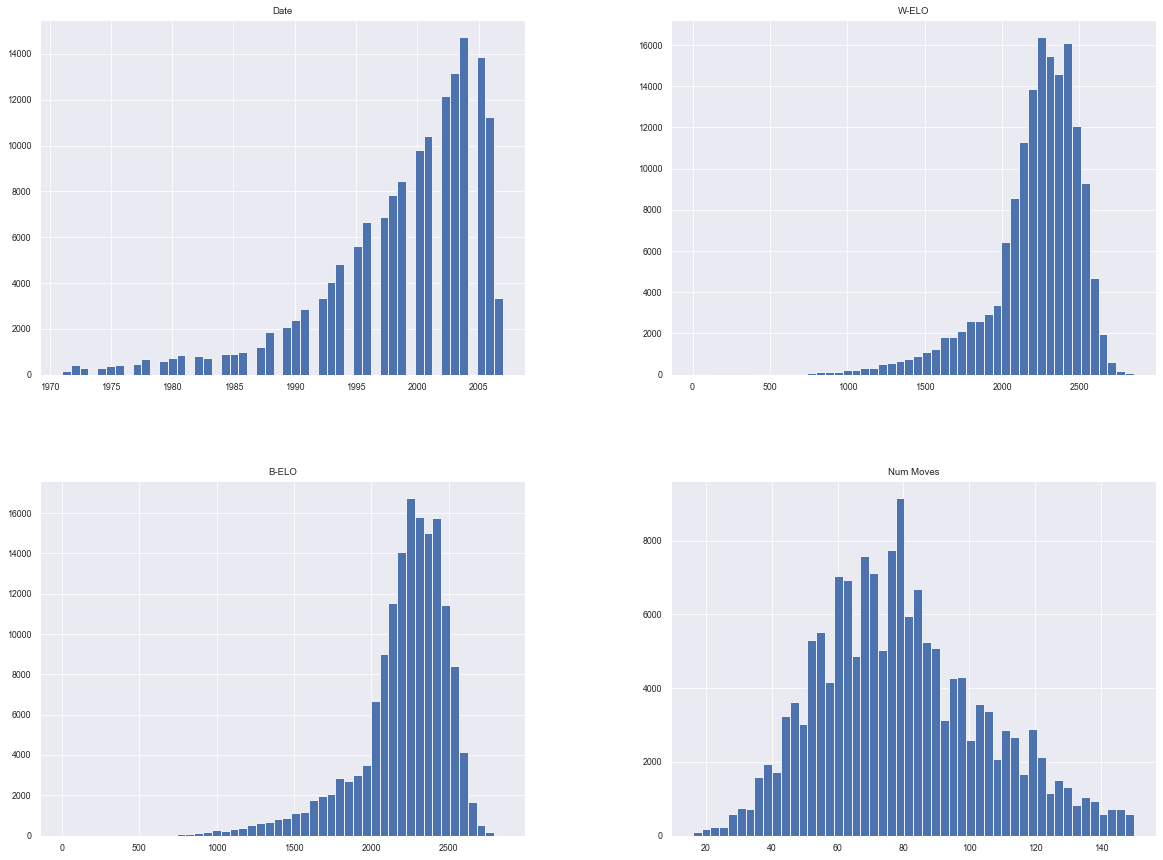

In [12]:
chess_data.hist(bins = 50, figsize = (20, 15));

Most of the games in this data set are from 1970 and on. This is mostly due to the fact that Chess became hugely popular in the U.S. and elsewhere during the Cold War (https://www.quora.com/How-did-chess-get-so-popular-during-the-Cold-War). The histogram tells us that most games last between 30 and 50 moves per player. Also White has a higher ELO on average than Black. We will calculate this mean again after the data has been further cleaned up.

In [13]:
chess_data['B-ELO'].mean()

2206.689905076246

In [14]:
chess_data['W-ELO'].mean()

2215.2228597380004

In the scatter matrix we can se that there is a strong correlation between W-ELO and B-ELO. This makes a lot of sense, because as White gets better, so does Black in order to stay competitive. We also observe that this data set has a nice mix of amateur games and also top player games by looking at the spread of ELO ratings versus date. We also note that the number of moves per game is evenly spread between few and many. That is interesting because the team assumed that there would be many more long games as the ELO ratings went up, but that is not the case.

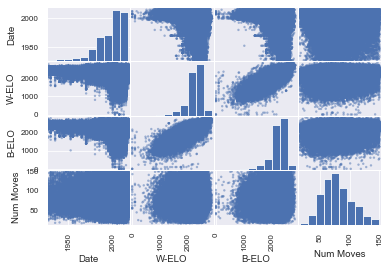

In [15]:
pd.plotting.scatter_matrix(chess_data[['Date', 'W-ELO', 'B-ELO', 'Num Moves']]);

The heatmap below confirms first impressions about the correlation between the ELO ratings. We will come back to this heatmap later when we analyze the openings. 

<AxesSubplot:>

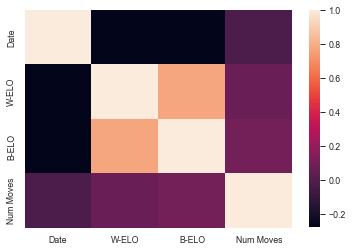

In [16]:
corr = chess_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Next, let's explore the common openings for White and Black. we make a few more dataframes that are views into chess_data. This will make it a little easier to do analysis. 

In [17]:
# consider the opening as the first 8 moves (each side).
openings_white = chess_data.loc[:, 'W1': 'W8': 2] 
openings_black = chess_data.loc[:, 'B1': 'B8': 2] 

In [18]:
openings_white.head()

,W1,W2,W3,W4,W5,W6,W7,W8
Game1,d4,c4,Nc3,cxd5,Bg5,Qc2,e3,Bd3
Game2,e4,Nf3,Bb5,c3,Qe2,d4,cxd4,e5
Game3,d4,c4,Nc3,Nf3,a4,Ne5,Nxc4,g3
Game4,e4,Nf3,Nxe5,Nf3,d4,Bd3,O-O,c4
Game5,e4,d4,Nc3,Bg5,Nxe4,Nf3,Nxf6+,h4


In [19]:
openings_black.head()

,B1,B2,B3,B4,B5,B6,B7,B8
Game1,d5,e6,Nf6,exd5,c6,Be7,Nbd7,O-O
Game2,c5,Nc6,d6,Nf6,e5,exd4,a6,Nd5
Game3,d5,c6,Nf6,dxc4,Bf5,Nbd7,Qc7,e5
Game4,e5,Nf6,d6,Nxe4,d5,Be7,Nc6,Nb4
Game5,e6,d5,Nf6,dxe4,Nbd7,Be7,Bxf6,O-O


We observe that there are well established common openings represented in the dataset for both players. Some of these openings include the Scott opening, King' Indian defense and the Sicilian Defence, Najdorf Variation.

In [20]:
openings_white.value_counts().head(10)

W1  W2   W3   W4    W5   W6    W7   W8   
e4  Nf3  d4   Nxd4  Nc3  Be3   f3   Qd2      1012
                         Ndb5  Bg5  Na3       916
         Bb5  Ba4   O-O  Re1   Bb3  c3        895
         d4   Nxd4  Nc3  Bg5   Qd2  O-O-O     855
d4  c4   Nc3  e4    Nf3  Be2   O-O  d5        485
e4  Nf3  d4   Nxd4  Nc3  Be2   O-O  Be3       444
                         Bg5   f4   Qf3       393
                         g3    Bg2  O-O       345
    d4   Nd2  e5    Bd3  c3    Ne2  cxd4      329
    Nf3  d4   Nxd4  Nc3  Be2   Nb3  O-O       318
dtype: int64

In [21]:
openings_black.value_counts().head(10)

B1   B2   B3    B4    B5   B6   B7    B8 
c5   Nc6  cxd4  Nf6   e5   d6   a6    b5     866
     d6   cxd4  Nf6   g6   Bg7  O-O   Nc6    861
e5   Nc6  a6    Nf6   Be7  b5   d6    O-O    725
Nf6  g6   Bg7   d6    O-O  e5   Nc6   Ne7    697
e6   d5   Nf6   Nfd7  c5   Nc6  cxd4  f6     377
c5   d6   cxd4  Nf6   a6   e6   Be7   Qc7    352
                      g6   Bg7  Nc6   O-O    345
Nf6  c5   e6    exd5  d6   g6   Bg7   O-O    334
c5   d6   cxd4  Nf6   a6   e6   Be7   O-O    282
                           e5   Be7   O-O    267
dtype: int64

It's interesting to note that Black's opening move list is more diverse than White's. This is most likely due to the reactionary nature of the game for Black. We can see that the most common opening is the Alekhine's defence (White e4, Black Nf6)

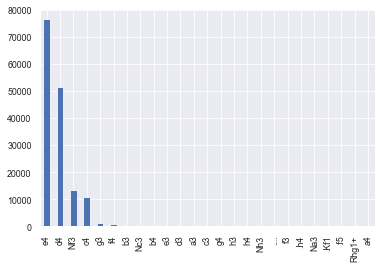

In [22]:
openings_white['W1'].value_counts().plot.bar();

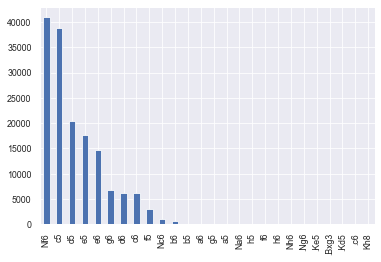

In [23]:
openings_black['B1'].value_counts().plot.bar();

One interesting thing to note here is how quickly there will be different chess games developing. Observe how many more moves are played at move 2 and 3. However, we can still observe that most games play out very similarly at the beginning.

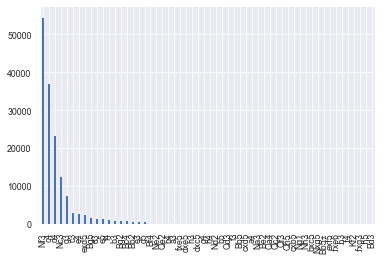

In [24]:
openings_white['W2'].value_counts().plot.bar();

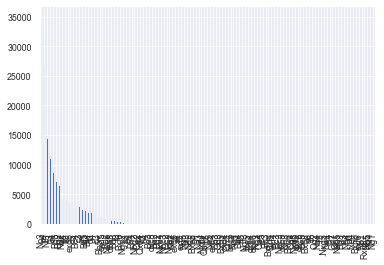

In [25]:
openings_white['W3'].value_counts().plot.bar();

In the facet grid below we can see an interesting feature. There are many outliers. 

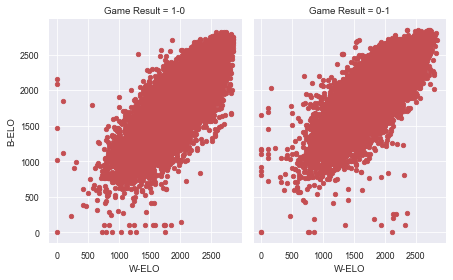

In [26]:
g = sns.FacetGrid(chess_data, col = 'Game Result', height = 4, aspect = 0.8)
g.map(plt.scatter, 'W-ELO', 'B-ELO', s = 20, color = "r");

From the plot below we see that we can take out some of those outliers by further cleaning the data to include only ELO ratings above 500.

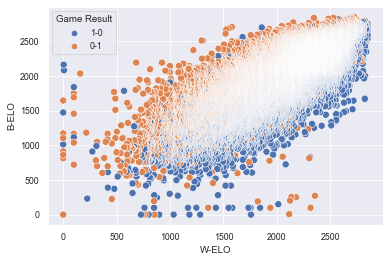

In [27]:
sns.scatterplot(x = 'W-ELO', y = 'B-ELO', hue = 'Game Result', data = chess_data, s = 50);

In [28]:
# trim low ELO ratings and reassign openings dataframes.
chess_data = chess_data[chess_data['W-ELO'] >= 500]
chess_data = chess_data[chess_data['B-ELO'] >= 500]

openings_white = chess_data.loc[:, 'W1': 'W8': 2] 
openings_black = chess_data.loc[:, 'B1': 'B8': 2] 

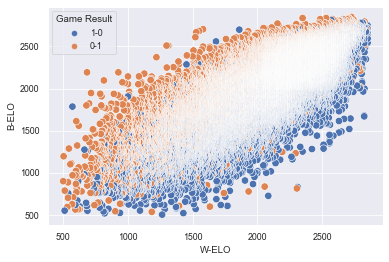

In [29]:
sns.scatterplot(x = 'W-ELO', y = 'B-ELO', hue = 'Game Result', data = chess_data, s = 55);

That looks much better but this plot shows something strange. Why are there so many games where the better player loses to the vastly worse player? For example, there are games where White is above 2000 ELO and loses to players below 1000. Perhaps this is an indication of match fixing, https://nextlevelchess.blog/pre-arranged/  ?

Another thing we observe is that the very best players win or lose at about the same rate (the end of the scatter plot is pointy).

There are no recorded games with W-ELO below 1500 until the 1980s. That's probably due to better record keeping as the years went by. Also, since chess popularity increased greatly during the late 70s and on, there would be more amateurs playing.

The plot below seems to show that white loses more often when the game is shorter.

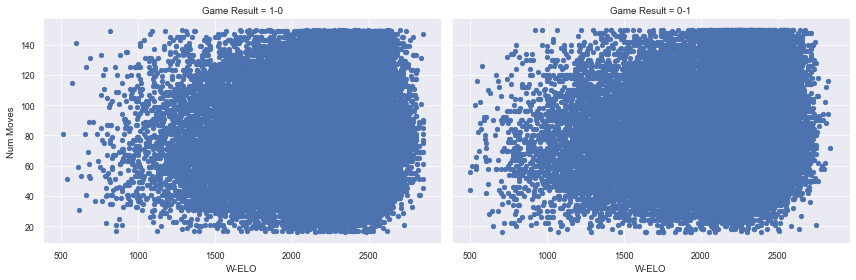

In [30]:
g = sns.FacetGrid(chess_data, col = 'Game Result', height = 4, aspect = 1.5)
g.map(plt.scatter, 'W-ELO', 'Num Moves', s = 20, color = "b");

We can do more analysis if we convert the Game Results column to int. 1 represents a win for White, 0 repesents loss for White

In [31]:
def GetResults(x):
  if x[0] == '0':
    return 0
  else:
    return 1
new_col = chess_data['Game Result'].apply(GetResults)
chess_data['Game Result'] = new_col

In [32]:
chess_data.dtypes

Date            int32
Game Result     int64
W-ELO           int32
B-ELO           int32
Num Moves       int32
                ...  
B73            string
W74            string
B74            string
W75            string
B75            string
Length: 155, dtype: object

The bar plot confirms what we already know, which is that white wins more games (1)

C:\Users\Abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


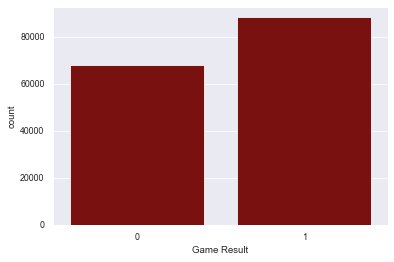

In [33]:
sns.countplot(chess_data['Game Result'], color = 'darkred');

The histogram further illustrates how closely matched White and Black players are in this data set.

<AxesSubplot:xlabel='W-ELO', ylabel='Count'>

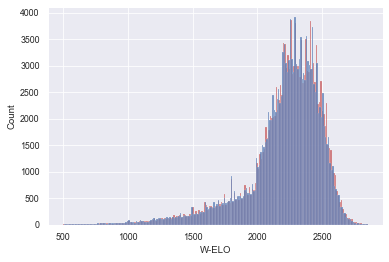

In [34]:
sns.histplot(chess_data['W-ELO'], color = 'r')
sns.histplot(chess_data['B-ELO'], color = 'b')

The following count plots better illustrate the most common first move for both players.

<AxesSubplot:xlabel='W1', ylabel='count'>

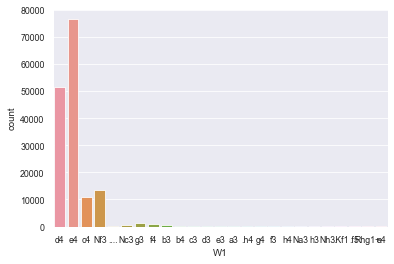

In [35]:
sns.countplot(x = openings_white['W1'])

<AxesSubplot:xlabel='B1', ylabel='count'>

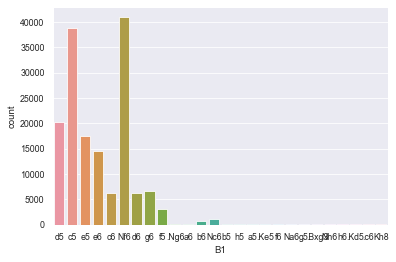

In [36]:
sns.countplot(x = openings_black['B1'])

#### CONVERT OPENINGS INTO NUM VALUES

It would be better to analyze the opening moves by treating them as integers.

In [37]:
# add columns to anaylize openings.
openings_white['W1-Numeric'] = openings_white['W1'].astype('category').cat.codes
openings_white['W2-Numeric'] = openings_white['W2'].astype('category').cat.codes
openings_white['W3-Numeric'] = openings_white['W3'].astype('category').cat.codes
openings_white['W4-Numeric'] = openings_white['W4'].astype('category').cat.codes
openings_white['W5-Numeric'] = openings_white['W5'].astype('category').cat.codes
openings_white['W6-Numeric'] = openings_white['W6'].astype('category').cat.codes
openings_white['W7-Numeric'] = openings_white['W7'].astype('category').cat.codes
openings_white['W8-Numeric'] = openings_white['W8'].astype('category').cat.codes

In [42]:
openings_black['B1-Numeric'] = openings_black['B1'].astype('category').cat.codes
openings_black['B2-Numeric'] = openings_black['B2'].astype('category').cat.codes
openings_black['B3-Numeric'] = openings_black['B3'].astype('category').cat.codes
openings_black['B4-Numeric'] = openings_black['B4'].astype('category').cat.codes
openings_black['B5-Numeric'] = openings_black['B5'].astype('category').cat.codes
openings_black['B6-Numeric'] = openings_black['B6'].astype('category').cat.codes
openings_black['B7-Numeric'] = openings_black['B7'].astype('category').cat.codes
openings_black['B8-Numeric'] = openings_black['B8'].astype('category').cat.codes

In [43]:
openings_white.head(10)

,W1,W2,W3,W4,W5,W6,W7,W8,W1-Numeric,W2-Numeric,W3-Numeric,W4-Numeric,W5-Numeric,W6-Numeric,W7-Numeric,W8-Numeric
Game1,d4,c4,Nc3,cxd5,Bg5,Qc2,e3,Bd3,16,35,36,157,30,225,440,28
Game2,e4,Nf3,Bb5,c3,Qe2,d4,cxd4,e5,18,18,8,151,168,350,422,557
Game3,d4,c4,Nc3,Nf3,a4,Ne5,Nxc4,g3,16,35,36,72,215,145,226,585
Game4,e4,Nf3,Nxe5,Nf3,d4,Bd3,O-O,c4,18,18,57,72,241,18,264,526
Game5,e4,d4,Nc3,Bg5,Nxe4,Nf3,Nxf6+,h4,18,39,36,23,139,155,252,602
Game6,e4,Nf3,d4,Nxd4,Nxc6,e5,Qe2,c4,18,18,86,89,131,364,293,526
Game7,e4,d4,Nc3,Bg5,Nxe4,Bxf6,Nf3,Qd2,18,39,36,23,139,74,192,356
Game8,e4,Nf3,Bb5,Ba4,O-O,d4,Bb3,dxe5,18,18,8,6,152,350,13,552
Game9,e4,d4,e5,Nc3,g4,Nge2,Nf4,dxc5,18,39,96,59,276,167,193,547
Game10,e4,Nf3,Bb5,Ba4,O-O,Re1,Bb3,c3,18,18,8,6,152,303,13,525


In [44]:
openings_black.head(10)

,B1,B2,B3,B4,B5,B6,B7,B8,B1-Numeric,B2-Numeric,B3-Numeric,B4-Numeric,B5-Numeric,B6-Numeric,B7-Numeric,B8-Numeric
Game1,d5,e6,Nf6,exd5,c6,Be7,Nbd7,O-O,16,64,55,214,280,30,159,327
Game2,c5,Nc6,d6,Nf6,e5,exd4,a6,Nd5,14,23,122,91,306,406,427,205
Game3,d5,c6,Nf6,dxc4,Bf5,Nbd7,Qc7,e5,16,54,55,200,25,132,304,562
Game4,e5,Nf6,d6,Nxe4,d5,Be7,Nc6,Nb4,18,30,122,112,293,30,168,169
Game5,e6,d5,Nf6,dxe4,Nbd7,Be7,Bxf6,O-O,19,58,55,204,103,30,97,327
Game6,e5,Nc6,exd4,Nf6,bxc6,Qe7,Nd5,Ba6,18,23,134,91,275,266,184,9
Game7,e6,d5,Nf6,dxe4,Be7,Bxf6,Nd7,O-O,19,58,55,204,24,85,186,327
Game8,e5,Nc6,a6,Nf6,Nxe4,b5,d5,Be6,18,23,102,91,167,365,462,33
Game9,c6,d5,Bf5,e6,Bg6,Ne7,c5,Nd7,15,58,16,211,32,164,448,207
Game10,e5,Nc6,a6,Nf6,Be7,b5,d6,O-O,18,23,102,91,24,365,463,327


In [45]:
# keep numeric opening data, remove the nonnumeric data
openings_white = openings_white.loc[:, 'W1-Numeric':]

In [46]:
openings_white.head()

,W1-Numeric,W2-Numeric,W3-Numeric,W4-Numeric,W5-Numeric,W6-Numeric,W7-Numeric,W8-Numeric
Game1,16,35,36,157,30,225,440,28
Game2,18,18,8,151,168,350,422,557
Game3,16,35,36,72,215,145,226,585
Game4,18,18,57,72,241,18,264,526
Game5,18,39,36,23,139,155,252,602


In [47]:
# keep numeric opening data, remove the nonnumeric data
openings_black = openings_black.loc[:, 'B1-Numeric':]

In [48]:
openings_black.head()

,B1-Numeric,B2-Numeric,B3-Numeric,B4-Numeric,B5-Numeric,B6-Numeric,B7-Numeric,B8-Numeric
Game1,16,64,55,214,280,30,159,327
Game2,14,23,122,91,306,406,427,205
Game3,16,54,55,200,25,132,304,562
Game4,18,30,122,112,293,30,168,169
Game5,19,58,55,204,103,30,97,327


We can use this numerical representation of the openings in heatmap to see how each game plays out in the beginning. The darker colors signify a lack or diversity of play. We see the same moves are consistently used in the first 1-3 moves and then starts to deviate. 

<AxesSubplot:>

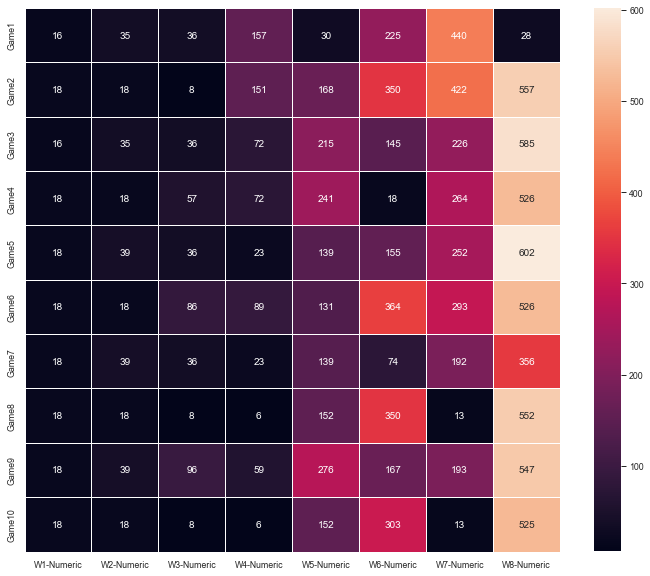

In [49]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(openings_white.iloc[:10, :], annot = True, fmt = "d", linewidths = 0.5, ax = ax)

<AxesSubplot:>

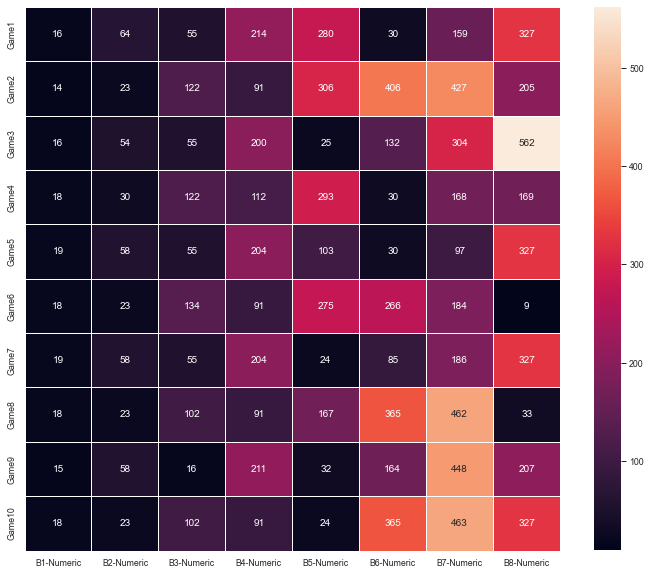

In [50]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(openings_black.iloc[:10, :], annot = True, fmt = "d", linewidths = 0.5, ax = ax)

One more observation about the openings. We see from the heatmap that the games really start to diversify after the 4th or 5th moves. If we plot some games and the moves after that, we see an interesting trend. White wins at key points consistently. For example, for the first 100 games analyzed, if Black plays c6 after White's Bg5, white wins, especially if the game goes on for more than 100 moves. But if Black responds to Bg5 with dxc4, then Black wins.

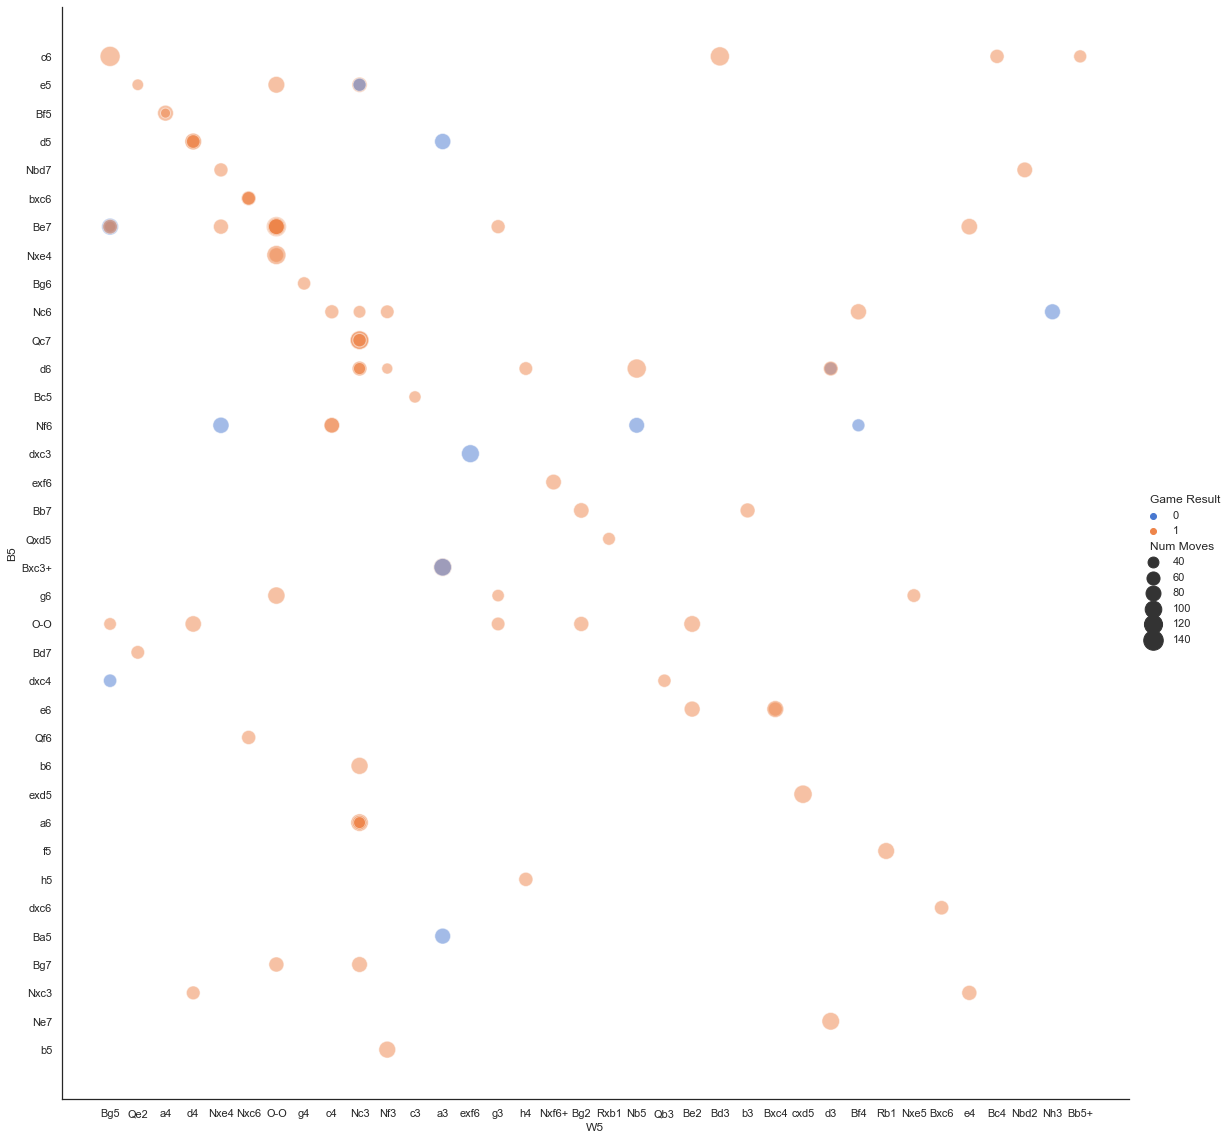

In [96]:
sns.set_theme(style = "white")
sns.relplot(x = 'W5', y = 'B5', hue = "Game Result", size = "Num Moves",
            sizes=(100, 400), alpha = 0.5, palette = "muted",
            height = 16, data = chess_data[:'Game100'])

Below we can see that the number of unique moves for each player is very similar. This means that each player has an established response to their opponents move. It would be strange, but also very interesting for Black to have 5000 unique moves at B50 instead of 1487. 

In [97]:
openings_white.apply(lambda x: len(x.unique()))

W1-Numeric     25
W2-Numeric     55
W3-Numeric    115
W4-Numeric    198
W5-Numeric    292
W6-Numeric    403
W7-Numeric    487
W8-Numeric    609
dtype: int64

In [98]:
openings_black.apply(lambda x: len(x.unique()))

B1-Numeric     26
B2-Numeric     77
B3-Numeric    155
B4-Numeric    240
B5-Numeric    342
B6-Numeric    446
B7-Numeric    523
B8-Numeric    604
dtype: int64

In [99]:
# early game
chess_data.loc[:, 'W9': 'B20'].apply(lambda x: len(x.unique()))

W9      689
B9      710
W10     788
B10     796
W11     890
B11     877
W12     959
B12     968
W13    1073
B13    1064
W14    1163
B14    1154
W15    1217
B15    1224
W16    1321
B16    1277
W17    1413
B17    1359
W18    1506
B18    1452
W19    1591
B19    1523
W20    1653
B20    1606
dtype: int64

In [100]:
# middle game
chess_data.loc[:, 'W21': 'B40'].apply(lambda x: len(x.unique()))

W21    1750
B21    1678
W22    1832
B22    1754
W23    1898
B23    1807
W24    1935
B24    1892
W25    2003
B25    1913
W26    2056
B26    1953
W27    2060
B27    2028
W28    2101
B28    2030
W29    2132
B29    2070
W30    2151
B30    2086
W31    2149
B31    2116
W32    2146
B32    2120
W33    2148
B33    2080
W34    2147
B34    2091
W35    2146
B35    2104
W36    2129
B36    2069
W37    2092
B37    2032
W38    2084
B38    2037
W39    2056
B39    1959
W40    1948
B40    1938
dtype: int64

It's also notable that there are many less unique moves at the end game. This makes a lot of sense because there are fewer pieces.

In [101]:
# end game
chess_data.loc[:, 'W41': 'B75'].apply(lambda x: len(x.unique()))

W41    1930
B41    1849
W42    1874
B42    1800
W43    1794
       ... 
B73     196
W74     185
B74     160
W75     140
B75     101
Length: 70, dtype: int64

Is there a mathematical limit to how many unique moves there are at each phase of the game? One interesting question is if the number of unique moves goes up or down as players get better.

We can find that out by analyzing it year by year. This is assuming that players are getting better each year. Let's also limit the ELO to 2000 or more.

In [106]:
# EARLY GAME, 1970S
chess_data[(chess_data['Date'] >= 1971) & (chess_data['Date'] < 1980) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W9': 'B20'].apply(lambda x: len(x.unique()))

W9     274
B9     275
W10    314
B10    313
W11    334
B11    358
W12    389
B12    401
W13    410
B13    436
W14    476
B14    465
W15    501
B15    502
W16    531
B16    521
W17    556
B17    545
W18    574
B18    578
W19    631
B19    598
W20    640
B20    623
dtype: int64

In [108]:
# EARLY GAME, 1980S
chess_data[(chess_data['Date'] >= 1980) & (chess_data['Date'] < 1990) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W9': 'B20'].apply(lambda x: len(x.unique()))

W9     356
B9     369
W10    414
B10    434
W11    479
B11    511
W12    526
B12    558
W13    608
B13    602
W14    647
B14    641
W15    674
B15    698
W16    716
B16    735
W17    748
B17    768
W18    800
B18    794
W19    845
B19    815
W20    866
B20    838
dtype: int64

In [109]:
# EARLY GAME, 1990S
chess_data[(chess_data['Date'] >= 1990) & (chess_data['Date'] < 2000) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W9': 'B20'].apply(lambda x: len(x.unique()))

W9      533
B9      556
W10     608
B10     631
W11     700
B11     705
W12     763
B12     761
W13     853
B13     841
W14     921
B14     891
W15     954
B15     962
W16    1024
B16     993
W17    1094
B17    1061
W18    1153
B18    1128
W19    1196
B19    1159
W20    1273
B20    1220
dtype: int64

How fascinating! The number of unique moves is going UP. That means the richness of the game is increasing with time. We can check the middle game meta from the 70s and compare that with the 90s

In [110]:
# MIDDLE GAME, 1970s
chess_data[(chess_data['Date'] >= 1971) & (chess_data['Date'] < 1980) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W21': 'B40'].apply(lambda x: len(x.unique()))

W21    652
B21    631
W22    691
B22    658
W23    712
B23    647
W24    685
B24    675
W25    701
B25    684
W26    718
B26    687
W27    713
B27    693
W28    736
B28    709
W29    747
B29    721
W30    763
B30    711
W31    754
B31    717
W32    727
B32    731
W33    734
B33    700
W34    704
B34    682
W35    739
B35    714
W36    712
B36    700
W37    697
B37    705
W38    681
B38    664
W39    678
B39    618
W40    637
B40    633
dtype: int64

In [111]:
# MIDDLE GAME, 1990S
chess_data[(chess_data['Date'] >= 1990) & (chess_data['Date'] < 2000) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W21': 'B40'].apply(lambda x: len(x.unique()))

W21    1323
B21    1297
W22    1381
B22    1332
W23    1451
B23    1358
W24    1434
B24    1411
W25    1508
B25    1430
W26    1519
B26    1484
W27    1507
B27    1485
W28    1540
B28    1516
W29    1550
B29    1522
W30    1594
B30    1556
W31    1599
B31    1527
W32    1580
B32    1557
W33    1573
B33    1534
W34    1563
B34    1516
W35    1592
B35    1558
W36    1552
B36    1526
W37    1535
B37    1498
W38    1534
B38    1492
W39    1505
B39    1460
W40    1430
B40    1425
dtype: int64

Wow... It's not even close. The diversity of the middle game meta increased dramatically between the 70s and 90s.

Finally, we investigate how the endgame meta has changed. We assumed that it would not have changed much because there are so few pieces at the endgame.

In [112]:
# ENDGAME, 1970S
chess_data[(chess_data['Date'] >= 1971) & (chess_data['Date'] < 1980) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W41': 'B75'].apply(lambda x: len(x.unique()))

W41    578
B41    568
W42    585
B42    527
W43    508
      ... 
B73     27
W74     24
B74     15
W75     13
B75      8
Length: 70, dtype: int64

In [113]:
# ENDGAME, 1990S
chess_data[(chess_data['Date'] >= 1990) & (chess_data['Date'] < 2000) & (chess_data['W-ELO'] >= 2000) & (chess_data['B-ELO'] >= 2000)].loc[:, 'W41': 'B75'].apply(lambda x: len(x.unique()))

W41    1436
B41    1373
W42    1364
B42    1333
W43    1326
       ... 
B73     113
W74     104
B74      80
W75      65
B75      47
Length: 70, dtype: int64

The diversity of the endgame meta also greatly increased between 1970 and 1990s.

In [ ]:
chess_data.to_pickle("./chess_data_ML.pkl", compression = 'zip')

In [ ]:
openings_white.to_pickle("./openings_white.pkl", compression = 'zip')

In [ ]:
openings_black.to_pickle("./openings_black.pkl", compression = 'zip')

In [ ]:
chess_data.to_csv('./chess_data_ML.csv')

In [ ]:
openings_white.to_csv('./openings_white.csv')

In [ ]:
openings_black.to_csv('./openings_black.csv')